In [60]:
from random import random
import matplotlib.pyplot as plt

y = [2*(x)**2  + random() for x in range(101)]
x = list(range(101))

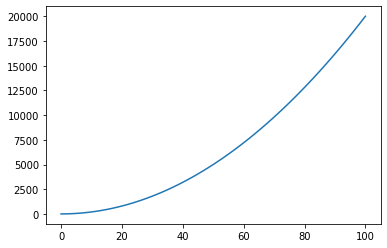

In [61]:
plt.plot(x,y)
plt.show()

In [62]:
x[-5:], y[-5:]

([96, 97, 98, 99, 100],
 [18432.275005547308,
  18818.849236717535,
  19208.447494574633,
  19602.72742674352,
  20000.549832401855])

In [63]:
## Let's limit x and y. Make model predict ##

X = x[:-1]
Y = y[:-1]

len(X), len(Y), len(x), len(y), x[-1], y[-1], X[-1], Y[-1]

(100, 100, 101, 101, 100, 20000.549832401855, 99, 19602.72742674352)

In [64]:
from statsmodels.tsa.ar_model import AR
model = AR(Y)
model_fit = model.fit()

## Predicting future value ##
y_pred = model_fit.predict(100,100)
print(y_pred)

[20000.56889068]


In [65]:
for each in x[-5:]:
    y_pred = model_fit.predict(each,each)
    print(each, y_pred)

96 [18432.1978857]
97 [18818.3288106]
98 [19208.68932906]
99 [19602.65160665]
100 [20000.56889068]


In [70]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(Y, order = [0,1,2])
model_fit = model.fit()
## Predicting future value ##
y_pred = model_fit.predict(100,100)
print(y_pred)

[13242.92178358]


In [72]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(Y)
model_fit = model.fit()
y_pred = model_fit.predict(100,100)
print(y_pred)

[19602.72742674]


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("C:\\Contents\\Kaggle\\intl_airline_passengers\\international-airline-passengers.csv")

df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [74]:
Y =  df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].values

In [75]:
len(Y)

145

In [76]:
X = list(range(len(Y)))

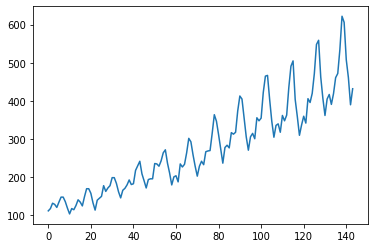

In [77]:
plt.plot(X,Y)

In [84]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
y_train, y_test = Y[0:train_size], Y[train_size:]
X_train, X_test = X[0:train_size], X[train_size:]
print(len(train), len(test))

95 47


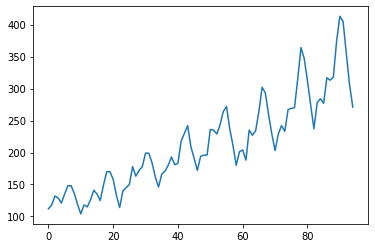

In [85]:
plt.plot(X_train, y_train)
plt.show()

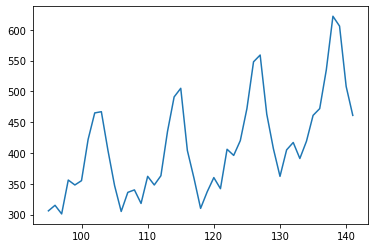

In [86]:
plt.plot(X_test, y_test)
plt.show()

In [87]:
model = AR(y_train)
model_fit = model.fit()

## Predicting future value ##
y_pred = model_fit.predict(X_test[0],X_test[-1])
print(y_pred)

[306.98580287 325.44180996 323.39387091 351.35824999 353.14484077
 371.53141825 427.04363684 470.9135027  462.61873374 416.80334801
 356.45281258 319.11791484 347.48380528 369.18835466 374.76896867
 393.10288698 400.63871214 428.08320492 489.30996498 536.97728568
 531.40716231 484.88854555 416.64870467 375.25426027 395.66902145
 419.73063522 430.23467197 443.5572798  454.91516776 490.94339217
 559.98417831 613.281968   611.4494443  562.2893299  487.27422105
 440.44393402 453.02334192 477.9648322  491.63024373 502.53802241
 517.04974358 561.66364574 639.97925695 701.09043247 703.82641222
 651.38233863 569.6698292 ]


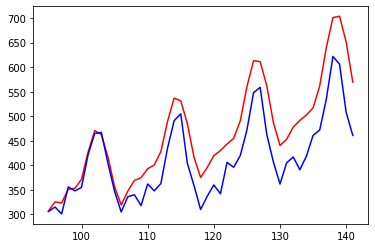

In [89]:
plt.plot(X_test, y_pred, color ='red')
plt.plot(X_test, y_test, color ='blue')
plt.show()

In [91]:
model = ARMA(y_train, order = [0,1,2])
model_fit = model.fit()
## Predicting future value ##
y_pred = model_fit.predict(X_test[0],X_test[-1])
print(y_pred)

[233.45676944 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646 212.32642646 212.32642646 212.32642646
 212.32642646 212.32642646]


In [92]:
model = SimpleExpSmoothing(y_train)
model_fit = model.fit()
y_pred = model_fit.predict(X_test[0],X_test[-1])
print(y_pred)

[271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271.
 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271.
 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271. 271.
 271. 271. 271. 271. 271.]
